In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import scipy.constants
from qutip import *
import random
from numpy.random import choice
import matplotlib.cm as cm
from sympy import *
from IPython.display import Image
from sympy.physics.wigner import wigner_6j
from sympy.physics.quantum.cg import CG
import tqdm
from numpy import random
from scipy.optimize import curve_fit

""" 
constants
"""
pi = np.pi
c = sp.constants.c
epsilon0 = sp.constants.epsilon_0
hbar = sp.constants.hbar
h = sp.constants.h
u = sp.constants.physical_constants['atomic mass constant'][0]
kB = sp.constants.physical_constants['Boltzmann constant'][0]
mB = sp.constants.physical_constants['Bohr magneton'][0]

# α/h [Hz/(V/m)2]=2.48832×10−8 α [a.u.] from https://arxiv.org/pdf/1507.06570.pdf
# α [a.u.] = 1.648 777 274 36 x 10-41 α [C2 m2 J-1] #https://physics.nist.gov/cgi-bin/cuu/Value?auepol
a_au = 1.64877727436*1e-41

C:\Users\klab\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#hyperfine reduced matrix element <F||d||F'>
def __Fg_d_Fe(Jg_d_Je, Fg, Fe, Jg, Je, I):
    return (
    Jg_d_Je * (-1)**(Fe+Jg+1+I) * 
        np.sqrt( (2*Fe+1)*(2*Jg+1) ) 
        * wigner_6j(Jg, Je, 1, Fe, Fg, I)
    )

In [3]:
#reduced matrix element <Jg||d||Je>
def __Jg_d_Je(omega_0, Jg, Je, tau):
    return np.sqrt(
        3*np.pi*epsilon0*hbar*c**3/omega_0**3/tau
        * (2*Je+1)/(2*Jg+1)
    )

In [4]:
def Rabi_clock(Fg, Fe, mg, me, d, pol):
    q = -(me-mg)
    Jg_d_Je = d
    
    CG_coeff = float(CG(Fe, me, 1, q, Fg, mg).doit())
    
    Eplus = pol * np.sqrt( intensity / 2 / epsilon0 / c)
    
    return (
    -2 * Jg_d_Je / hbar * Eplus * CG_coeff
    )
    

In [5]:
wH = 0.025e-3
wV = wH
P = 0.6*80e-3
intensity = 2*P/np.pi/wV/wH
d = 4.5*hbar

In [6]:
Rabi_clock(1/2, 1/2, 1/2, -1/2, 4.5*hbar,  1)/1e6/2/np.pi

0.11223749592894952

In [7]:
Rabi_clock(1/2, 1/2, 1/2, 1/2, 4.5*hbar,  1)/1e6/2/np.pi

-0.07936389447475771

In [8]:
print(float(CG(1/2, -1/2, 1, 1, 1/2, 1/2).doit()))
print(float(CG(1/2, 1/2, 1, -1, 1/2, -1/2).doit()))

-0.816496580927726
0.816496580927726


In [9]:
def cos_fit(t, f, phi):
    return -np.cos(2*np.pi*t*f+phi)*1/2+1/2

In [10]:
""" 
constants
"""
pi = np.pi
c = sp.constants.c
epsilon0 = sp.constants.epsilon_0
hbar = sp.constants.hbar
h = sp.constants.h
u = sp.constants.physical_constants['atomic mass constant'][0]
kB = sp.constants.physical_constants['Boltzmann constant'][0]
mB = sp.constants.physical_constants['Bohr magneton'][0]

# α/h [Hz/(V/m)2]=2.48832×10−8 α [a.u.] from https://arxiv.org/pdf/1507.06570.pdf
# α [a.u.] = 1.648 777 274 36 x 10-41 α [C2 m2 J-1] #https://physics.nist.gov/cgi-bin/cuu/Value?auepol
a_au = 1.64877727436*1e-41

In [12]:
_lambda = 578e-9
omega_r = 2*np.pi*9.4e3
m = 171*u
tau = 22

k = 2*np.pi/_lambda #momentum kick 
x0 = np.sqrt(hbar/2/m/omega_r) #oscillator length
LambDicke = x0*k #Lamb-Dicke parameters
print('Lamb-Dicke parameter (eta): ', LambDicke)
print('eta^2 (2n+1): ', LambDicke**2, '(2n+1)')
print('Max n for Lamb-Dicke regime: n = ', floor(((1/LambDicke**2)-1)/2))

Lamb-Dicke parameter (eta):  0.6095349993254959
eta^2 (2n+1):  0.3715329154027323 (2n+1)
Max n for Lamb-Dicke regime: n =  0


In [13]:
N=10 #keep HO states up to N 

one = basis(4,0)
two = basis(4,1)
three = basis(4,2)
four = basis(4,3)
ground = fock(N, 0)

a = qutip.tensor(destroy(N), identity(4))
adag = qutip.tensor(create(N), identity(4))

sig_11 = qutip.tensor(identity(N),one*one.dag())
sig_22 = qutip.tensor(identity(N),two*two.dag())
sig_33 = qutip.tensor(identity(N),three*three.dag())
sig_44 = qutip.tensor(identity(N),four*four.dag())

sig_14 = qutip.tensor(identity(N),one*four.dag())
sig_41 = qutip.tensor(identity(N),four*one.dag())

sig_13 = qutip.tensor(identity(N),one*three.dag())
sig_31 = qutip.tensor(identity(N),three*one.dag())

sig_24 = qutip.tensor(identity(N),two*four.dag())
sig_42 = qutip.tensor(identity(N),four*two.dag())

sig_23 = qutip.tensor(identity(N),two*three.dag())
sig_32 = qutip.tensor(identity(N),three*two.dag())

# calibrate pi_time

In [38]:
psi0 = 1/np.sqrt(2)*(one+two)
psii = 1/np.sqrt(2)*(three-four)
rhoi = psii*psii.dag()
i_proj = qutip.tensor(identity(N), rhoi)
ground_proj = qutip.tensor(ground*ground.dag(), identity(4))

In [56]:
T=0.86e-6 #initial temperature
omega_r_deep = 2*np.pi*58e3
n_start =1/(np.exp(hbar*omega_r_deep/T/kB)-1)
rho0 = qutip.tensor(thermal_dm(N, n_start), psi0*psi0.dag()) #start in up thermal state
print(isherm(rho0))
print('n_start: ', n_start)
print('ground state population', (rho0*ground_proj).tr())

True
n_start:  0.040900516094455636
ground state population 0.9607066040778716


In [63]:
B = 0e-4 #magnetic field in T
print('Magnetic field B', B*1e4, 'G')

delta_Ne = -2*np.pi*582*B*1e4 #excited
delta_Ng = -2*np.pi*375*B*1e4 #ground
Fg=1/2
Fe=1/2

Magnetic field B 0.0 G


In [64]:
dt = 1e-8
t_ls = np.arange(0, 1000*dt, dt)

In [65]:
#diagonal terms
diag_1 = -delta_Ng

diag_2 = delta_Ng

diag_3 = -delta_Ne

diag_4 = delta_Ne

In [66]:
phi = 0
angle_pol = 5e-3

## polarization ##
##################

#basis
x = np.array([1,0,0])
y = np.array([0,1,0])
z = np.array([0,0,1])

polarization = (np.cos(angle_pol)*x+np.sin(angle_pol)*np.exp(-1j*phi)*z)

#spherical tensor
pi_pol = x
sigp_pol = 1/np.sqrt(2)*(-z-1j*y)
sigm_pol = -1/np.sqrt(2)*(-z+1j*y)

#off-diagonal terms
offdiag_31 = Rabi_clock(Fg, Fe, -1/2, -1/2, d, np.dot(polarization, pi_pol)) / 2
offdiag_41 = Rabi_clock(Fg, Fe, -1/2, 1/2, d, np.dot(polarization, sigp_pol)) / 2
offdiag_32 = Rabi_clock(Fg, Fe, 1/2, -1/2, d, np.dot(polarization, sigm_pol)) / 2
offdiag_42 = Rabi_clock(Fg, Fe, 1/2, 1/2, d, np.dot(polarization, pi_pol)) / 2

offdiag_14 = np.conjugate(offdiag_41)
offdiag_13 = np.conjugate(offdiag_31)
offdiag_24 = np.conjugate(offdiag_42)
offdiag_23 = np.conjugate(offdiag_32)

H0 = (
diag_1*sig_11 + diag_2*sig_22 + diag_3*sig_33 + diag_4*sig_44

 ) 

Hm = omega_r*(adag*a + 1/2)

Hd = ( (1j*LambDicke*(adag+a)).expm()*(offdiag_13*sig_13 +  offdiag_14*sig_14 +
                                       offdiag_24*sig_24 + offdiag_23*sig_23)
                                      
     + (-1j*LambDicke*(adag+a)).expm()*(offdiag_31*sig_31 + offdiag_41*sig_41
                                        + offdiag_42*sig_42 + offdiag_32*sig_32) )

H = H0 + Hm + Hd

c_ops = []

options = qutip.solver.Options(nsteps=100000)

output = mesolve(H, rho0, t_ls, c_ops, options=options, progress_bar=True)

10.1%. Run time:   0.01s. Est. time left: 00:00:00:00
20.1%. Run time:   0.02s. Est. time left: 00:00:00:00
30.1%. Run time:   0.03s. Est. time left: 00:00:00:00
40.1%. Run time:   0.03s. Est. time left: 00:00:00:00
50.0%. Run time:   0.04s. Est. time left: 00:00:00:00
60.0%. Run time:   0.05s. Est. time left: 00:00:00:00
70.0%. Run time:   0.06s. Est. time left: 00:00:00:00
80.0%. Run time:   0.07s. Est. time left: 00:00:00:00
90.0%. Run time:   0.07s. Est. time left: 00:00:00:00
Total run time:   0.08s


In [67]:
rho_ls = output.states

P = [(i_proj*rho).tr()  for rho in rho_ls]
Pg = [(ground_proj*rho).tr()  for rho in rho_ls]

max fidelity: 0.993


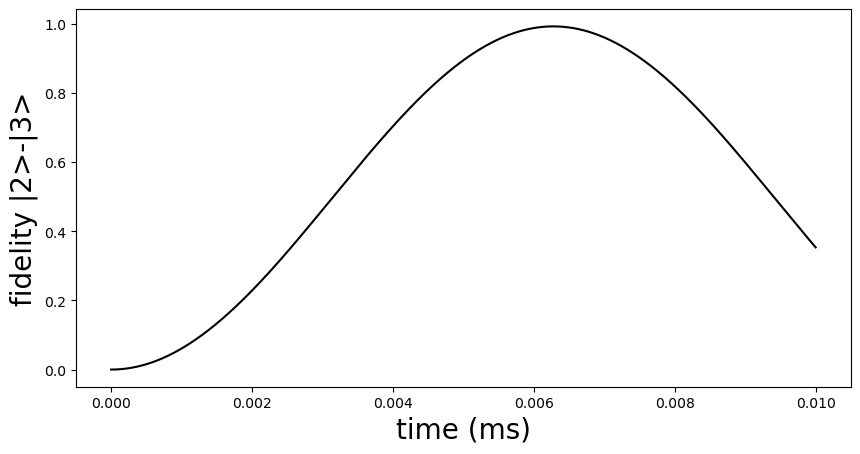

In [68]:
fig, axes = plt.subplots(1,1, dpi=100, sharex=True, figsize=(10,5))
axes.plot(t_ls*1e3, abs(np.array(P)), color='k', linestyle='-', label = 'mF=-1/2')
axes.set_xlabel(r'time (ms)', fontsize=20)
axes.set_ylabel(r'fidelity |2>-|3>', fontsize=20)
print('max fidelity: %.3f' %np.max(abs(np.array(P))))

pi_time_idx = np.argwhere(abs(np.array(P))==np.max(abs(np.array(P))))
pi_time = t_ls[pi_time_idx]

(0.0, 1.0)

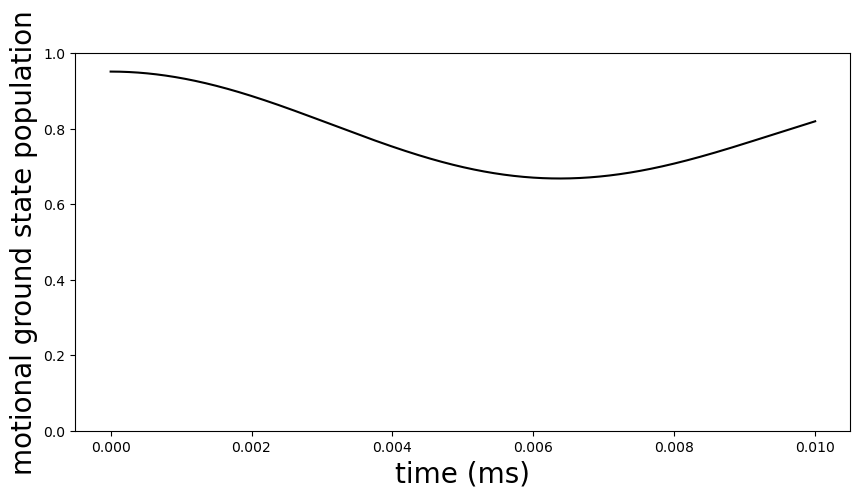

In [47]:
fig, axes = plt.subplots(1,1, dpi=100, sharex=True, figsize=(10,5))
axes.plot(t_ls*1e3, Pg, color='k', linestyle='-', label = 'mF=-1/2')
axes.set_xlabel(r'time (ms)', fontsize=20)
axes.set_ylabel(r'motional ground state population', fontsize=20)
axes.set_ylim(0., 1)
#axes.set_xlim(0, 0.01)

In [23]:
B_ls = np.linspace(0, 35, 100)*1e-4 #magnetic field in T

In [25]:
phi = 0
angle_pol = 5e-3

## polarization ##
##################

#basis
x = np.array([1,0,0])
y = np.array([0,1,0])
z = np.array([0,0,1])

polarization = (np.cos(angle_pol)*x+np.sin(angle_pol)*np.exp(-1j*phi)*z)

#spherical tensor
pi_pol = x
sigp_pol = 1/np.sqrt(2)*(-z-1j*y)
sigm_pol = -1/np.sqrt(2)*(-z+1j*y)

#off-diagonal terms
offdiag_31 = Rabi_clock(Fg, Fe, -1/2, -1/2, d, np.dot(polarization, pi_pol)) / 2
offdiag_41 = Rabi_clock(Fg, Fe, -1/2, 1/2, d, np.dot(polarization, sigp_pol)) / 2
offdiag_32 = Rabi_clock(Fg, Fe, 1/2, -1/2, d, np.dot(polarization, sigm_pol)) / 2
offdiag_42 = Rabi_clock(Fg, Fe, 1/2, 1/2, d, np.dot(polarization, pi_pol)) / 2

offdiag_14 = np.conjugate(offdiag_41)
offdiag_13 = np.conjugate(offdiag_31)
offdiag_24 = np.conjugate(offdiag_42)
offdiag_23 = np.conjugate(offdiag_32)


tpi_ls = np.arange(0, pi_time, dt)

result_ls = []

for B in B_ls:
    delta_Ne = -2*np.pi*582*B*1e4 #excited
    delta_Ng = -2*np.pi*375*B*1e4 #ground
    Fg=1/2
    Fe=1/2

    #diagonal terms
    diag_1 = -delta_Ng

    diag_2 = delta_Ng

    diag_3 = -delta_Ne

    diag_4 = delta_Ne
    H0 = (
    diag_1*sig_11 + diag_2*sig_22 + diag_3*sig_33 + diag_4*sig_44

     ) 

    Hm = omega_r*(adag*a + 1/2)

    Hd = ( (1j*LambDicke*(adag+a)).expm()*(offdiag_13*sig_13 +  offdiag_14*sig_14 +
                                           offdiag_24*sig_24 + offdiag_23*sig_23)

         + (-1j*LambDicke*(adag+a)).expm()*(offdiag_31*sig_31 + offdiag_41*sig_41
                                            + offdiag_42*sig_42 + offdiag_32*sig_32) )

    H = H0 + Hm + Hd

    c_ops = []

    options = qutip.solver.Options(nsteps=100000)

    output = mesolve(H, rho0, tpi_ls, c_ops, options=options, progress_bar=True)
    result_ls.append(output)

10.0%. Run time:   0.00s. Est. time left: 00:00:00:00
20.1%. Run time:   0.01s. Est. time left: 00:00:00:00
30.1%. Run time:   0.01s. Est. time left: 00:00:00:00
40.0%. Run time:   0.02s. Est. time left: 00:00:00:00
50.1%. Run time:   0.02s. Est. time left: 00:00:00:00
60.1%. Run time:   0.02s. Est. time left: 00:00:00:00
70.0%. Run time:   0.03s. Est. time left: 00:00:00:00
80.1%. Run time:   0.03s. Est. time left: 00:00:00:00
90.1%. Run time:   0.04s. Est. time left: 00:00:00:00
Total run time:   0.04s
10.0%. Run time:   0.00s. Est. time left: 00:00:00:00
20.1%. Run time:   0.01s. Est. time left: 00:00:00:00
30.1%. Run time:   0.01s. Est. time left: 00:00:00:00
40.0%. Run time:   0.02s. Est. time left: 00:00:00:00
50.1%. Run time:   0.02s. Est. time left: 00:00:00:00
60.1%. Run time:   0.02s. Est. time left: 00:00:00:00
70.0%. Run time:   0.03s. Est. time left: 00:00:00:00
80.1%. Run time:   0.03s. Est. time left: 00:00:00:00
90.1%. Run time:   0.04s. Est. time left: 00:00:00:00
Tota

In [26]:
rho_ls = [out.states[-1] for out in result_ls]

P = [(i_proj*rho).tr()  for rho in rho_ls]
Pg = [(ground_proj*rho).tr()  for rho in rho_ls]

max fidelity: 0.992


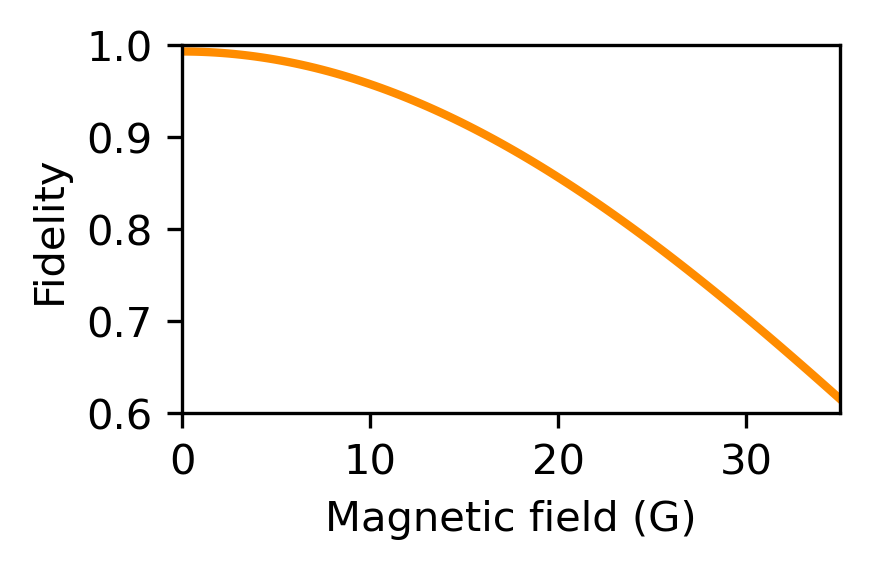

In [37]:
fig, axes = plt.subplots(1,1, dpi=300, sharex=True, figsize=(3, 2))
axes.plot(B_ls*1e4, abs(np.array(P)), color='darkorange', linestyle='-', label = 'mF=-1/2', linewidth=2)
axes.set_xlabel(r'Magnetic field (G)')
axes.set_ylabel(r'Fidelity')
print('max fidelity: %.3f' %np.max(abs(np.array(P))))
plt.ylim(0.6, 1)
plt.xlim(0, 35)
pi_time_idx = np.argwhere(abs(np.array(P))==np.max(abs(np.array(P))))
pi_time = t_ls[pi_time_idx]
plt.tight_layout()
plt.savefig('pipolshelve.pdf', format='pdf', dpi=300)

(0.0, 1.0)

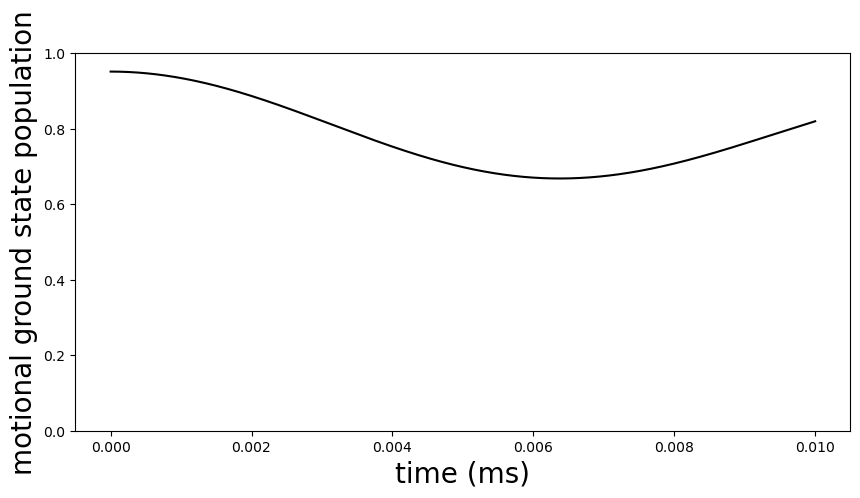

In [22]:
fig, axes = plt.subplots(1,1, dpi=100, sharex=True, figsize=(10,5))
axes.plot(t_ls*1e3, Pg, color='k', linestyle='-', label = 'mF=-1/2')
axes.set_xlabel(r'time (ms)', fontsize=20)
axes.set_ylabel(r'motional ground state population', fontsize=20)
axes.set_ylim(0., 1)
#axes.set_xlim(0, 0.01)

# mapping input states

In [31]:
tpi_ls = np.arange(0, pi_time, dt)

In [32]:
psi0_ls = [one, 1/np.sqrt(2)*(one+two), 1/np.sqrt(2)*(one-two), two]
state_list = [one, two, three, four]
dm_ls = [n*m.dag() for n in state_list for m in state_list]

T=1e-6 #initial temperature
omega_r_deep = 2*np.pi*63e3
n_start =1/(np.exp(hbar*omega_r_deep/T/kB)-1)
rho0_ls = [qutip.tensor(thermal_dm(N, n_start), psi0*psi0.dag()) for psi0 in psi0_ls] #start in up thermal state

ground_proj = qutip.tensor(ground*ground.dag(), identity(4))

In [33]:
result_ls = []

for rho0 in rho0_ls:
    output = mesolve(H, rho0, tpi_ls, c_ops, options=options, progress_bar=True)
    result_ls.append(output)

10.0%. Run time:   0.02s. Est. time left: 00:00:00:00
20.1%. Run time:   0.03s. Est. time left: 00:00:00:00
30.1%. Run time:   0.05s. Est. time left: 00:00:00:00
40.0%. Run time:   0.05s. Est. time left: 00:00:00:00
50.1%. Run time:   0.05s. Est. time left: 00:00:00:00
60.1%. Run time:   0.06s. Est. time left: 00:00:00:00
70.0%. Run time:   0.06s. Est. time left: 00:00:00:00
80.1%. Run time:   0.08s. Est. time left: 00:00:00:00
90.1%. Run time:   0.08s. Est. time left: 00:00:00:00
Total run time:   0.08s
10.0%. Run time:   0.02s. Est. time left: 00:00:00:00
20.1%. Run time:   0.02s. Est. time left: 00:00:00:00
30.1%. Run time:   0.03s. Est. time left: 00:00:00:00
40.0%. Run time:   0.03s. Est. time left: 00:00:00:00
50.1%. Run time:   0.05s. Est. time left: 00:00:00:00
60.1%. Run time:   0.05s. Est. time left: 00:00:00:00
70.0%. Run time:   0.05s. Est. time left: 00:00:00:00
80.1%. Run time:   0.07s. Est. time left: 00:00:00:00
90.1%. Run time:   0.07s. Est. time left: 00:00:00:00
Tota

In [34]:
dm_ls[0]

Quantum object: dims = [[4], [4]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

In [35]:
dm_filled = []
rho_in_ls = []

for n, output in enumerate(result_ls):
    rho =  output.states[-1]
    rho_tr = [(rho*qutip.tensor(identity(N),dm)).tr() for dm in dm_ls]
    rho_in = [(rho0_ls[n]*qutip.tensor(identity(N),dm)).tr() for dm in dm_ls]
    dm_filled.append(rho_tr)
    rho_in_ls.append(rho_in)
    

In [36]:
dm_ls[4]

Quantum object: dims = [[4], [4]], shape = (4, 4), type = oper, isherm = False
Qobj data =
[[0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

In [37]:
out = [np.array(dm).reshape(4,4) for dm in dm_filled]
_input = [np.array(dm).reshape(4,4) for dm in rho_in_ls]

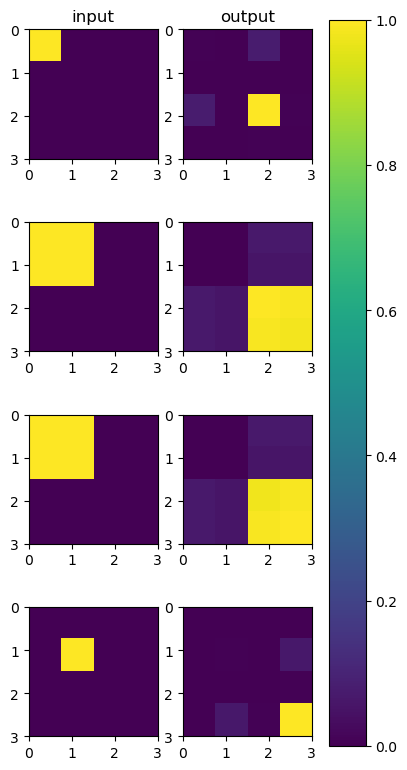

In [71]:
fig, ax = plt.subplots(4,2, figsize=(4,8))

cmap = 'viridis'
for i, o in enumerate(out):
    a = ax[i, 0].imshow(np.abs(_input[i]).reshape(4,4), cmap=cmap, origin='upper',
                   extent = [0, 3, 3,0])
    b = ax[i, 1].imshow(np.abs(o).reshape(4,4), cmap=cmap, origin='upper', extent = [0, 3, 3,0])

ax[0, 0].set_title('input')
ax[0, 1].set_title('output')
plt.tight_layout()
fig.colorbar(cm.ScalarMappable(cmap=cmap), ax=ax)
    

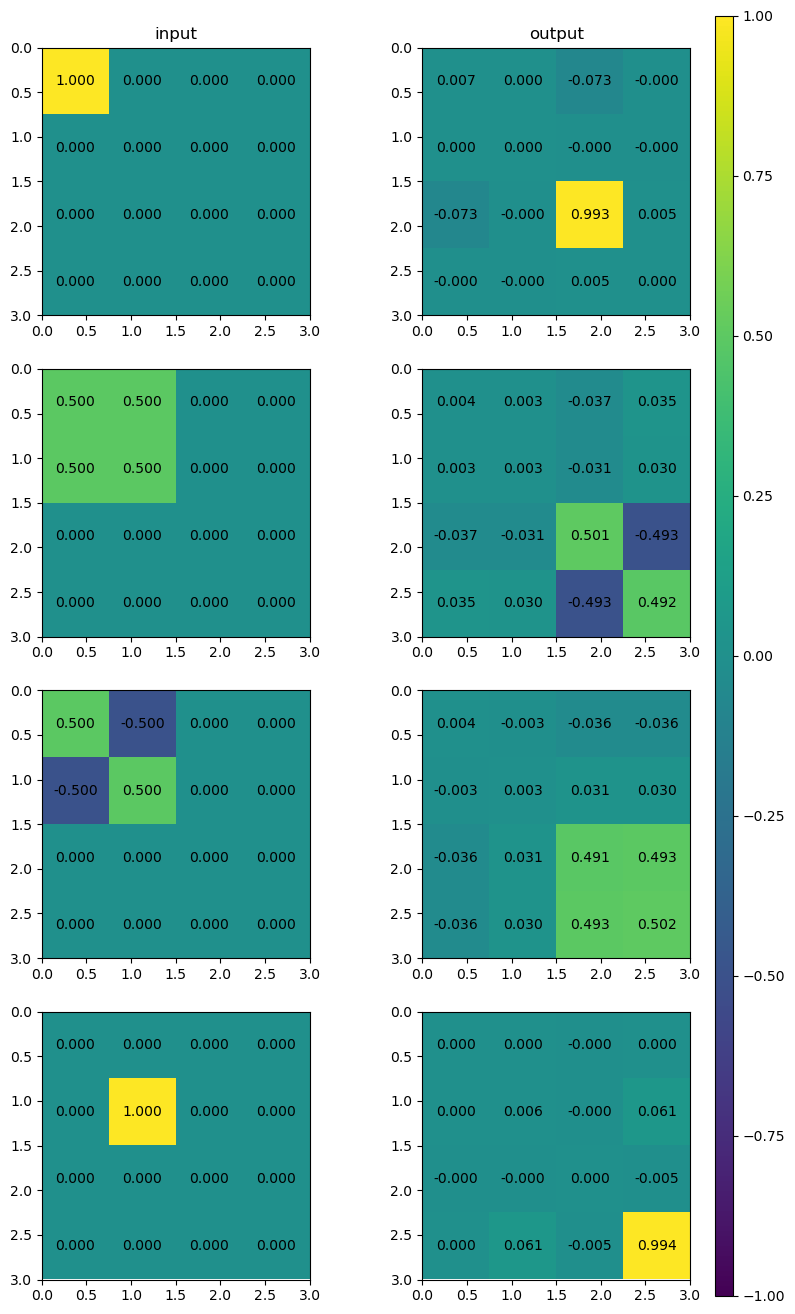

In [126]:
size = 4

# Limits for the extent
x_start = 0
x_end = 3
y_start = 0
y_end = 3

extent = [x_start, x_end, y_start, y_end]

# The normal figure
fig, ax = plt.subplots(4,2, figsize=(9, 16))

cmap = 'viridis'
for i, o in enumerate(out):
    data1 = np.real(_input[i]).reshape(4,4)
    a = ax[i, 0].imshow(data1, cmap=cmap, origin='upper',
                   extent = [0, 3, 3,0], vmin=-1, vmax=1)
    # Add the text
    jump_x = (x_end - x_start) / (2.0 * size)
    jump_y = (y_end - y_start) / (2.0 * size)
    x_positions = np.linspace(start=x_start, stop=x_end, num=size, endpoint=False)
    y_positions = np.linspace(start=y_start, stop=y_end, num=size, endpoint=False)

    for y_index, y in enumerate(y_positions):
        for x_index, x in enumerate(x_positions):
            label = data1[y_index, x_index]
            text_x = x + jump_x
            text_y = y + jump_y
            ax[i, 0].text(text_x, text_y, "{:.3f}".format(label), color='black', ha='center', va='center')

    data2 = np.real(o).reshape(4,4)        
    b = ax[i, 1].imshow(data2, cmap=cmap, origin='upper', extent = [0, 3, 3,0], vmin=-1, vmax=1)
    # Add the text
    jump_x = (x_end - x_start) / (2.0 * size)
    jump_y = (y_end - y_start) / (2.0 * size)
    x_positions = np.linspace(start=x_start, stop=x_end, num=size, endpoint=False)
    y_positions = np.linspace(start=y_start, stop=y_end, num=size, endpoint=False)

    for y_index, y in enumerate(y_positions):
        for x_index, x in enumerate(x_positions):
            label = data2[y_index, x_index]
            text_x = x + jump_x
            text_y = y + jump_y
            ax[i, 1].text(text_x, text_y, "{:.3f}".format(label), color='black', ha='center', va='center')
            
            
ax[0, 0].set_title('input')
ax[0, 1].set_title('output')

cb_ax = fig.add_axes([0.9, 0.1, 0.02, 0.8])
cbar = fig.colorbar(a, cax=cb_ax)

plt.savefig( "mcm_map_sig_real.png", format="png", dpi=300)

# Spin-sensitive detection

In [538]:
_lambda = 578e-9
omega_r = 2*np.pi*8e3
m = 171*u
tau = 22

k = 2*np.pi/_lambda #momentum kick 
x0 = np.sqrt(hbar/2/m/omega_r) #oscillator length
LambDicke = x0*k #Lamb-Dicke parameters
print('Lamb-Dicke parameter (eta): ', LambDicke)
print('eta^2 (2n+1): ', LambDicke**2, '(2n+1)')
print('Max n for Lamb-Dicke regime: n = ', floor(((1/LambDicke**2)-1)/2))

Lamb-Dicke parameter (eta):  0.6607201946347716
eta^2 (2n+1):  0.4365511755982105 (2n+1)
Max n for Lamb-Dicke regime: n =  0


In [539]:
N=20 #keep HO states up to N 

one = basis(4,0)
two = basis(4,1)
three = basis(4,2)
four = basis(4,3)
ground = fock(N, 0)

a = qutip.tensor(destroy(N), identity(4))
adag = qutip.tensor(create(N), identity(4))

sig_11 = qutip.tensor(identity(N),one*one.dag())
sig_22 = qutip.tensor(identity(N),two*two.dag())
sig_33 = qutip.tensor(identity(N),three*three.dag())
sig_44 = qutip.tensor(identity(N),four*four.dag())

sig_14 = qutip.tensor(identity(N),one*four.dag())
sig_41 = qutip.tensor(identity(N),four*one.dag())

sig_13 = qutip.tensor(identity(N),one*three.dag())
sig_31 = qutip.tensor(identity(N),three*one.dag())

sig_24 = qutip.tensor(identity(N),two*four.dag())
sig_42 = qutip.tensor(identity(N),four*two.dag())

sig_23 = qutip.tensor(identity(N),two*three.dag())
sig_32 = qutip.tensor(identity(N),three*two.dag())

# calibrate pi_time

In [540]:
psi0 = (two)
psii = (three)
rhoi = psii*psii.dag()
i_proj = qutip.tensor(identity(N), rhoi)
ground_proj = qutip.tensor(ground*ground.dag(), identity(4))

In [541]:
T=1e-6 #initial temperature
omega_r_deep = 2*np.pi*63e3
n_start =1/(np.exp(hbar*omega_r_deep/T/kB)-1)
rho0 = qutip.tensor(thermal_dm(N, n_start), psi0*psi0.dag()) #start in up thermal state
print(isherm(rho0))
print('n_start: ', n_start)
print('ground state population', (rho0*ground_proj).tr())

True
n_start:  0.05111530367346818
ground state population 0.9513704124610985


In [542]:
B = 6.8*4.8e-4/20 #magnetic field in T
print('Magnetic field B', B*1e4, 'G')

delta_Ne = -2*np.pi*582*B*1e4 #excited
delta_Ng = -2*np.pi*375*B*1e4 #ground
Fg=1/2
Fe=1/2

Magnetic field B 1.6320000000000001 G


In [546]:
dt = 1e-8
t_ls = np.arange(0, 1000*dt, dt)

In [547]:
#diagonal terms
diag_1 = -delta_Ng

diag_2 = delta_Ng

diag_3 = -delta_Ne

diag_4 = delta_Ne

In [548]:
def Hp_coeff(t, args):
    return np.exp(1j*delta*t)

def Hm_coeff(t, args):
    return np.exp(-1j*delta*t)

In [549]:
phi = -np.pi/2
angle_pol = (np.pi/4)

impurity = 2e-2

## polarization ##
##################

#basis
x = np.array([1,0,0])
y = np.array([0,1,0])
z = np.array([0,0,1])

xb = np.array([np.sqrt(1-impurity),impurity,0])
yb = np.array([-impurity,np.sqrt(1-impurity),0])
zb = np.array([0,0,1])

polarization = (np.cos(angle_pol)*xb+np.sin(angle_pol)*np.exp(-1j*phi)*zb)

pi_pol = y
sigp_pol = 1/np.sqrt(2)*(z-1j*x)
sigm_pol = -1/np.sqrt(2)*(z+1j*x)

#off-diagonal terms
offdiag_31 = Rabi_clock(Fg, Fe, -1/2, -1/2, d, np.dot(polarization, pi_pol)) / 2
offdiag_41 = Rabi_clock(Fg, Fe, -1/2, 1/2, d, np.dot(polarization, sigp_pol)) / 2
offdiag_32 = Rabi_clock(Fg, Fe, 1/2, -1/2, d, np.dot(polarization, sigm_pol)) / 2
offdiag_42 = Rabi_clock(Fg, Fe, 1/2, 1/2, d, np.dot(polarization, pi_pol)) / 2

offdiag_14 = np.conjugate(offdiag_41)
offdiag_13 = np.conjugate(offdiag_31)
offdiag_24 = np.conjugate(offdiag_42)
offdiag_23 = np.conjugate(offdiag_32)

delta = -(delta_Ng+delta_Ne)

H0 = (
diag_1*sig_11 + diag_2*sig_22 + diag_3*sig_33 + diag_4*sig_44

 ) 

Hm = omega_r*(adag*a + 1/2)

H1_diag = H0+Hm
H1_offdiag = (offdiag_13*sig_13 +  offdiag_14*sig_14 +
                                       offdiag_24*sig_24 + offdiag_23*sig_23)*( (1j*LambDicke*(adag+a)).expm())

H1_conj = (offdiag_31*sig_31 + offdiag_41*sig_41
                                        + offdiag_42*sig_42 + offdiag_32*sig_32)*( (-1j*LambDicke*(adag+a)).expm())

c_ops = []

options = qutip.solver.Options(nsteps=100000)

output = mesolve([H1_diag, [H1_offdiag, Hp_coeff], [H1_conj, Hm_coeff]], rho0, t_ls, 
                      c_ops, options=options)

In [550]:
rho_ls = output.states

P = [(i_proj*rho).tr()  for rho in rho_ls]
Pg = [(ground_proj*rho).tr()  for rho in rho_ls]

max fidelity: 0.9964
4.47e-06 1e-08


(0.99, 1.0)

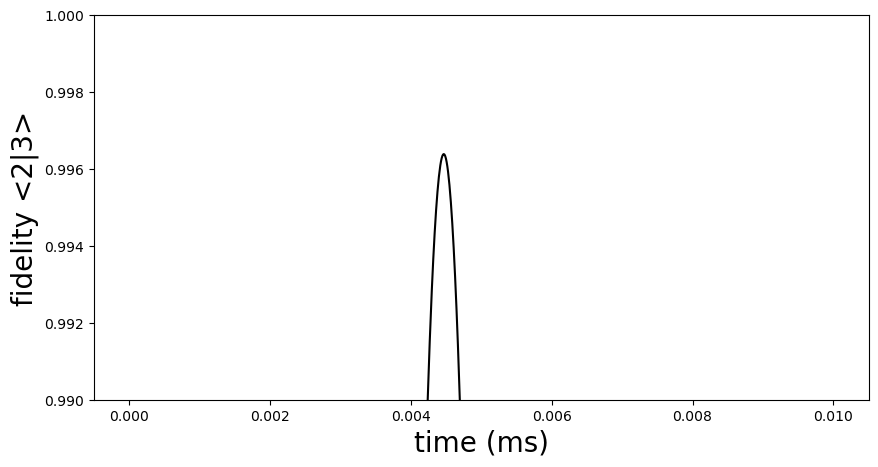

In [551]:
fig, axes = plt.subplots(1,1, dpi=100, sharex=True, figsize=(10,5))
axes.plot(t_ls*1e3, np.array(P), color='k', linestyle='-', label = 'mF=-1/2')
axes.set_xlabel(r'time (ms)', fontsize=20)
axes.set_ylabel(r'fidelity <2|3>', fontsize=20)
print('max fidelity: %.4f' %np.max(abs(np.array(P))))
axes.set_ylim(0,1)

pi_time_idx = np.argwhere(abs(np.array(P))==np.max(abs(np.array(P))))
pi_time = t_ls[pi_time_idx][0][0]
print(pi_time, dt)
axes.set_ylim(0.99, 1)

(0.0, 1.0)

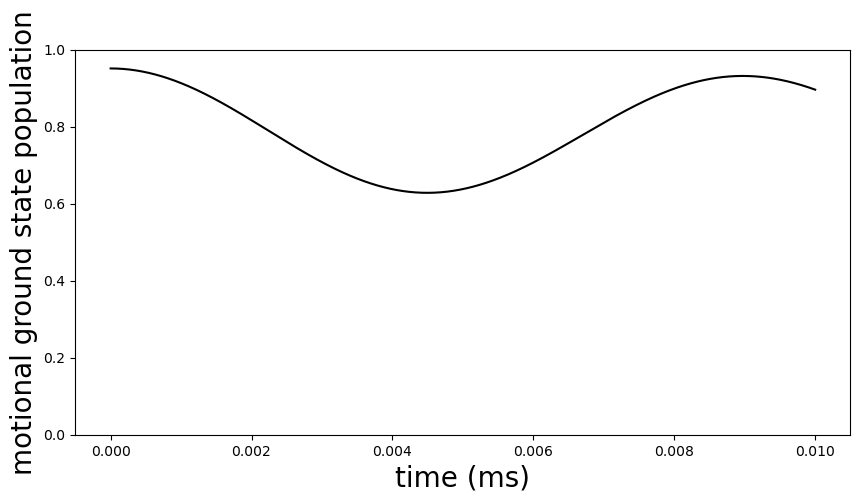

In [552]:
fig, axes = plt.subplots(1,1, dpi=100, sharex=True, figsize=(10,5))
axes.plot(t_ls*1e3, Pg, color='k', linestyle='-', label = 'mF=-1/2')
axes.set_xlabel(r'time (ms)', fontsize=20)
axes.set_ylabel(r'motional ground state population', fontsize=20)
axes.set_ylim(0., 1)
#axes.set_xlim(0, 0.01)

In [553]:
640/1300/50

0.009846153846153846

In [554]:
6/0.7/0.7

12.244897959183675

# mapping input states

In [555]:
tpi_ls = np.arange(0, pi_time, dt)

In [556]:
psi0_ls = [one, 1/np.sqrt(2)*(one+two), 1/np.sqrt(2)*(one-two), two]
state_list = [one, two, three, four]
dm_ls = [n*m.dag() for n in state_list for m in state_list]

T=1e-6 #initial temperature
omega_r_deep = 2*np.pi*63e3
n_start =1/(np.exp(hbar*omega_r_deep/T/kB)-1)
rho0_ls = [qutip.tensor(thermal_dm(N, n_start), psi0*psi0.dag()) for psi0 in psi0_ls] #start in up thermal state

ground_proj = qutip.tensor(ground*ground.dag(), identity(4))

In [557]:
result_ls = []

for rho0 in rho0_ls:
    
    
    output = mesolve([H1_diag, [H1_offdiag, Hp_coeff], [H1_conj, Hm_coeff]], rho0, tpi_ls, 
                      c_ops, options=options)
    result_ls.append(output)

In [558]:
dm_filled = []
rho_in_ls = []

for n, output in enumerate(result_ls):
    rho =  output.states[-1]
    rho_tr = [(rho*qutip.tensor(identity(N),dm)).tr() for dm in dm_ls]
    rho_in = [(rho0_ls[n]*qutip.tensor(identity(N),dm)).tr() for dm in dm_ls]
    dm_filled.append(rho_tr)
    rho_in_ls.append(rho_in)
    

In [559]:
out = [np.array(dm).reshape(4,4) for dm in dm_filled]
_input = [np.array(dm).reshape(4,4) for dm in rho_in_ls]

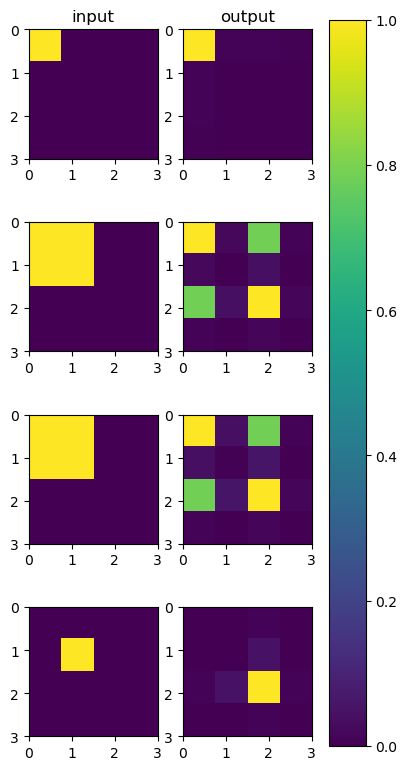

In [560]:
fig, ax = plt.subplots(4,2, figsize=(4,8))

cmap = 'viridis'
for i, o in enumerate(out):
    a = ax[i, 0].imshow(np.abs(_input[i]).reshape(4,4), cmap=cmap, origin='upper',
                   extent = [0, 3, 3,0])
    b = ax[i, 1].imshow(np.abs(o).reshape(4,4), cmap=cmap, origin='upper', extent = [0, 3, 3,0])

ax[0, 0].set_title('input')
ax[0, 1].set_title('output')
plt.tight_layout()
fig.colorbar(cm.ScalarMappable(cmap=cmap), ax=ax)
    

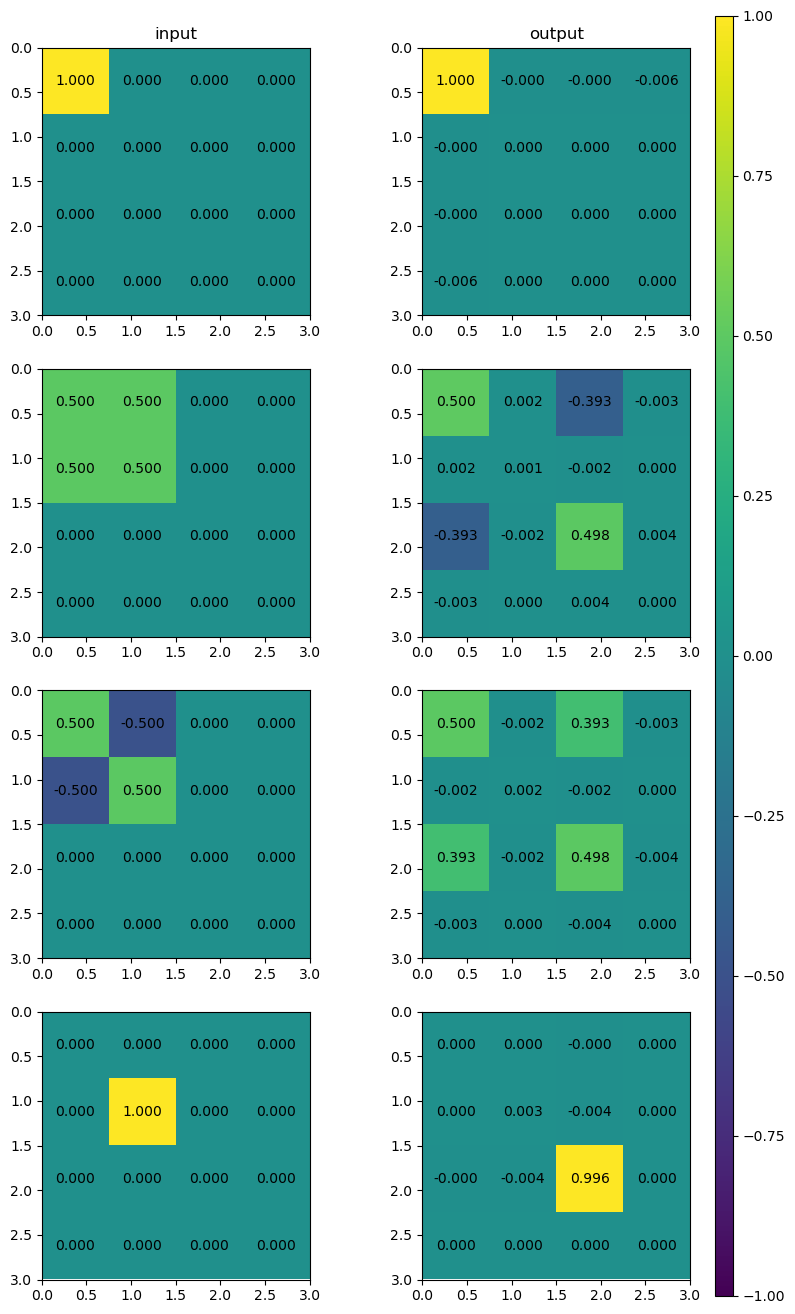

In [561]:
size = 4

# Limits for the extent
x_start = 0
x_end = 3
y_start = 0
y_end = 3

extent = [x_start, x_end, y_start, y_end]

# The normal figure
fig, ax = plt.subplots(4,2, figsize=(9, 16))

cmap = 'viridis'
for i, o in enumerate(out):
    data1 = np.real(_input[i]).reshape(4,4)
    a = ax[i, 0].imshow(data1, cmap=cmap, origin='upper',
                   extent = [0, 3, 3,0], vmin=-1, vmax=1)
    # Add the text
    jump_x = (x_end - x_start) / (2.0 * size)
    jump_y = (y_end - y_start) / (2.0 * size)
    x_positions = np.linspace(start=x_start, stop=x_end, num=size, endpoint=False)
    y_positions = np.linspace(start=y_start, stop=y_end, num=size, endpoint=False)

    for y_index, y in enumerate(y_positions):
        for x_index, x in enumerate(x_positions):
            label = data1[y_index, x_index]
            text_x = x + jump_x
            text_y = y + jump_y
            ax[i, 0].text(text_x, text_y, "{:.3f}".format(label), color='black', ha='center', va='center')

    data2 = np.real(o).reshape(4,4)        
    b = ax[i, 1].imshow(data2, cmap=cmap, origin='upper', extent = [0, 3, 3,0], vmin=-1, vmax=1)
    # Add the text
    jump_x = (x_end - x_start) / (2.0 * size)
    jump_y = (y_end - y_start) / (2.0 * size)
    x_positions = np.linspace(start=x_start, stop=x_end, num=size, endpoint=False)
    y_positions = np.linspace(start=y_start, stop=y_end, num=size, endpoint=False)

    for y_index, y in enumerate(y_positions):
        for x_index, x in enumerate(x_positions):
            label = data2[y_index, x_index]
            text_x = x + jump_x
            text_y = y + jump_y
            ax[i, 1].text(text_x, text_y, "{:.3f}".format(label), color='black', ha='center', va='center')
            
            
ax[0, 0].set_title('input')
ax[0, 1].set_title('output')

cb_ax = fig.add_axes([0.9, 0.1, 0.02, 0.8])
cbar = fig.colorbar(a, cax=cb_ax)

plt.savefig( "mcm_map_sig_real.png", format="png", dpi=300)

# Spin-sensitive detection and recovery

In [481]:
_lambda = 578e-9
omega_r = 2*np.pi*8e3
m = 171*u
tau = 22

k = 2*np.pi/_lambda #momentum kick 
x0 = np.sqrt(hbar/2/m/omega_r) #oscillator length
LambDicke = x0*k #Lamb-Dicke parameters
print('Lamb-Dicke parameter (eta): ', LambDicke)
print('eta^2 (2n+1): ', LambDicke**2, '(2n+1)')
print('Max n for Lamb-Dicke regime: n = ', floor(((1/LambDicke**2)-1)/2))

Lamb-Dicke parameter (eta):  0.6607201946347716
eta^2 (2n+1):  0.4365511755982105 (2n+1)
Max n for Lamb-Dicke regime: n =  0


In [482]:
N=20 #keep HO states up to N 

one = basis(4,0)
two = basis(4,1)
three = basis(4,2)
four = basis(4,3)
ground = fock(N, 0)

a = qutip.tensor(destroy(N), identity(4))
adag = qutip.tensor(create(N), identity(4))

sig_11 = qutip.tensor(identity(N),one*one.dag())
sig_22 = qutip.tensor(identity(N),two*two.dag())
sig_33 = qutip.tensor(identity(N),three*three.dag())
sig_44 = qutip.tensor(identity(N),four*four.dag())

sig_14 = qutip.tensor(identity(N),one*four.dag())
sig_41 = qutip.tensor(identity(N),four*one.dag())

sig_13 = qutip.tensor(identity(N),one*three.dag())
sig_31 = qutip.tensor(identity(N),three*one.dag())

sig_24 = qutip.tensor(identity(N),two*four.dag())
sig_42 = qutip.tensor(identity(N),four*two.dag())

sig_23 = qutip.tensor(identity(N),two*three.dag())
sig_32 = qutip.tensor(identity(N),three*two.dag())

# calibrate pi_time

In [491]:
psi0 = (two)
rhoi = two*two.dag()
i_proj = qutip.tensor(identity(N), rhoi)
ground_proj = qutip.tensor(ground*ground.dag(), identity(4))

In [492]:
T=1e-6 #initial temperature
omega_r_deep = 2*np.pi*63e3
n_start =1/(np.exp(hbar*omega_r_deep/T/kB)-1)
rho0 = qutip.tensor(thermal_dm(N, n_start), psi0*psi0.dag()) #start in up thermal state
print(isherm(rho0))
print('n_start: ', n_start)
print('ground state population', (rho0*ground_proj).tr())

True
n_start:  0.05111530367346818
ground state population 0.9513704124610985


In [485]:
B = 6.8*4.8e-4/20 #magnetic field in T
print('Magnetic field B', B*1e4, 'G')

delta_Ne = -2*np.pi*582*B*1e4 #excited
delta_Ng = -2*np.pi*375*B*1e4 #ground
Fg=1/2
Fe=1/2

Magnetic field B 1.6320000000000001 G


In [486]:
#diagonal terms
diag_1 = -delta_Ng

diag_2 = delta_Ng

diag_3 = -delta_Ne

diag_4 = delta_Ne

In [487]:
def Hp_coeff(t, args):
    return np.exp(1j*delta*t)

def Hm_coeff(t, args):
    return np.exp(-1j*delta*t)

In [508]:
phi = -np.pi/2
angle_pol = (np.pi/4)+5e-3

## polarization ##
##################

#basis
x = np.array([1,0,0])
y = np.array([0,1,0])
z = np.array([0,0,1])

polarization = (np.cos(angle_pol)*x+np.sin(angle_pol)*np.exp(-1j*phi)*z)

pi_pol = y
sigp_pol = 1/np.sqrt(2)*(z-1j*x)
sigm_pol = -1/np.sqrt(2)*(z+1j*x)

#off-diagonal terms
offdiag_31 = Rabi_clock(Fg, Fe, -1/2, -1/2, d, np.dot(polarization, pi_pol)) / 2
offdiag_41 = Rabi_clock(Fg, Fe, -1/2, 1/2, d, np.dot(polarization, sigp_pol)) / 2
offdiag_32 = Rabi_clock(Fg, Fe, 1/2, -1/2, d, np.dot(polarization, sigm_pol)) / 2
offdiag_42 = Rabi_clock(Fg, Fe, 1/2, 1/2, d, np.dot(polarization, pi_pol)) / 2

offdiag_14 = np.conjugate(offdiag_41)
offdiag_13 = np.conjugate(offdiag_31)
offdiag_24 = np.conjugate(offdiag_42)
offdiag_23 = np.conjugate(offdiag_32)

delta = -(delta_Ng+delta_Ne)

H0 = (
diag_1*sig_11 + diag_2*sig_22 + diag_3*sig_33 + diag_4*sig_44

 ) 

Hm = omega_r*(adag*a + 1/2)

H1_diag = H0+Hm
H1_offdiag = (offdiag_13*sig_13 +  offdiag_14*sig_14 +
                                       offdiag_24*sig_24 + offdiag_23*sig_23)*( (1j*LambDicke*(adag+a)).expm())

H1_conj = (offdiag_31*sig_31 + offdiag_41*sig_41
                                        + offdiag_42*sig_42 + offdiag_32*sig_32)*( (-1j*LambDicke*(adag+a)).expm())

c_ops = []

options = qutip.solver.Options(nsteps=100000)

dt = 1e-8
tpi_ls = np.arange(0, 4.45e-06, dt)

output0 = mesolve([H1_diag, [H1_offdiag, Hp_coeff], [H1_conj, Hm_coeff]], rho0, tpi_ls, 
                      c_ops, options=options)


twait_ls = np.linspace(0.1e-3, 0.3e-3, 50)

result_ls = []

Hm_wait = omega_r_deep*(adag*a + 1/2)

H1wait_diag = H0+Hm

i = 0
for tw in twait_ls:
    rho1 = output0.states[-1]
    dtw = 1/omega_r_deep/20
    tw_ls = np.arange(tpi_ls[-1], tpi_ls[-1]+tw, dtw)
    output1 = mesolve(H1wait_diag, rho1, tw_ls, c_ops, options=options)
    
    rho2 = output1.states[-1]
    
    tw2_ls = np.arange(tpi_ls[-1]+tw, 2*tpi_ls[-1]+tw, dt)
    
    output2 = mesolve([H1_diag, [H1_offdiag, Hp_coeff], [H1_conj, Hm_coeff]], rho2, tw2_ls, 
                      c_ops, options=options)
    #print(output2.states[-1])
    result_ls.append(output2.states[-1])
    print(i)
    i += 1


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


In [509]:
#rho_ls = output.states

P = [(i_proj*rho).tr()  for rho in result_ls]
Pg = [(ground_proj*rho).tr()  for rho in result_ls]

max fidelity: 0.99991
min fidelity: 0.9817


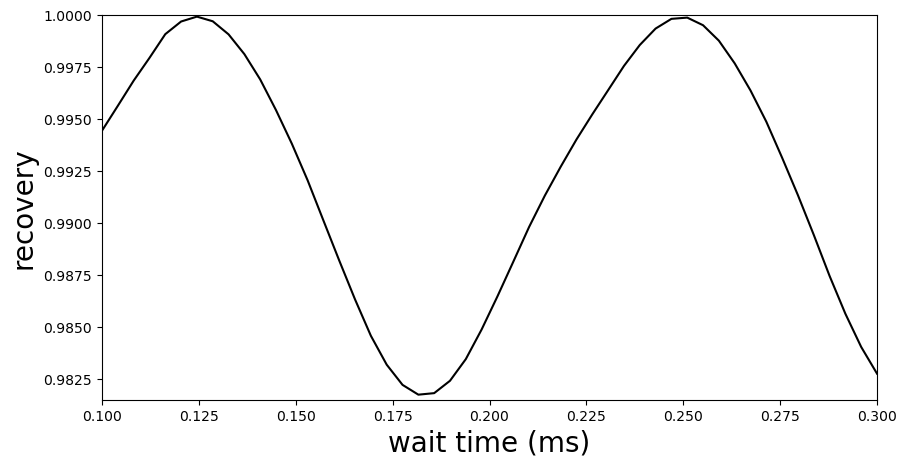

In [516]:
fig, axes = plt.subplots(1,1, dpi=100, sharex=True, figsize=(10,5))
axes.plot(twait_ls*1e3, np.array(P), color='k', linestyle='-', label = 'mF=-1/2')
axes.set_xlabel(r'wait time (ms)', fontsize=20)
axes.set_ylabel(r'recovery', fontsize=20)
print('max fidelity: %.5f' %np.max(abs(np.array(P))))
axes.set_ylim(0.9815,1)
axes.set_xlim(0.1,0.3)
print('min fidelity: %.4f' %np.min(abs(np.array(P))))

In [534]:
1/0.125

8.0

In [507]:
0.996**2

0.992016

max fidelity: 0.9999


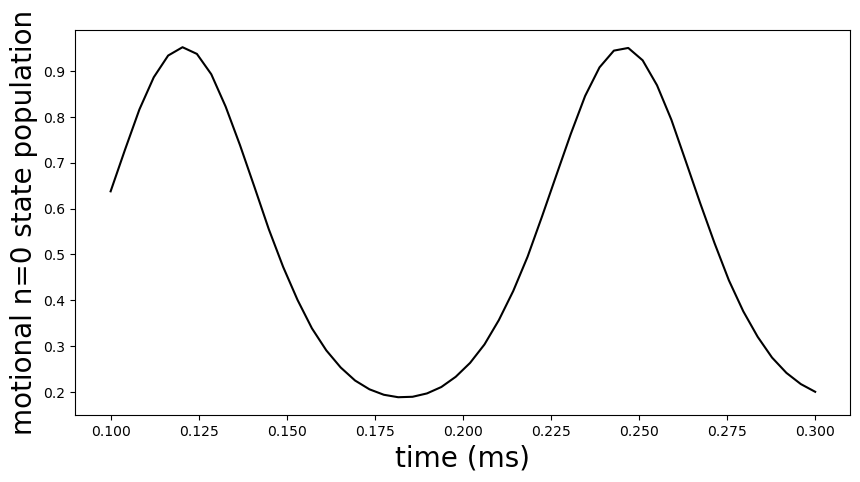

In [519]:
fig, axes = plt.subplots(1,1, dpi=100, sharex=True, figsize=(10,5))
axes.plot(twait_ls*1e3, np.array(Pg), color='k', linestyle='-', label = 'mF=-1/2')
axes.set_xlabel(r'time (ms)', fontsize=20)
axes.set_ylabel(r'motional n=0 state population', fontsize=20)
print('max fidelity: %.4f' %np.max(abs(np.array(P))))

In [415]:
1/0.005

200.0

# mapping input states

In [398]:
tpi_ls = np.arange(0, pi_time, dt)

In [399]:
psi0_ls = [one, 1/np.sqrt(2)*(one+two), 1/np.sqrt(2)*(one-two), two]
state_list = [one, two, three, four]
dm_ls = [n*m.dag() for n in state_list for m in state_list]

T=1e-6 #initial temperature
omega_r_deep = 2*np.pi*63e3
n_start =1/(np.exp(hbar*omega_r_deep/T/kB)-1)
rho0_ls = [qutip.tensor(thermal_dm(N, n_start), psi0*psi0.dag()) for psi0 in psi0_ls] #start in up thermal state

ground_proj = qutip.tensor(ground*ground.dag(), identity(4))

In [400]:
result_ls = []

for rho0 in rho0_ls:
    
    
    output = mesolve([H1_diag, [H1_offdiag, Hp_coeff], [H1_conj, Hm_coeff]], rho0, tpi_ls, 
                      c_ops, options=options)
    result_ls.append(output)

In [377]:
dm_filled = []
rho_in_ls = []

for n, output in enumerate(result_ls):
    rho =  output.states[-1]
    rho_tr = [(rho*qutip.tensor(identity(N),dm)).tr() for dm in dm_ls]
    rho_in = [(rho0_ls[n]*qutip.tensor(identity(N),dm)).tr() for dm in dm_ls]
    dm_filled.append(rho_tr)
    rho_in_ls.append(rho_in)
    

In [378]:
out = [np.array(dm).reshape(4,4) for dm in dm_filled]
_input = [np.array(dm).reshape(4,4) for dm in rho_in_ls]

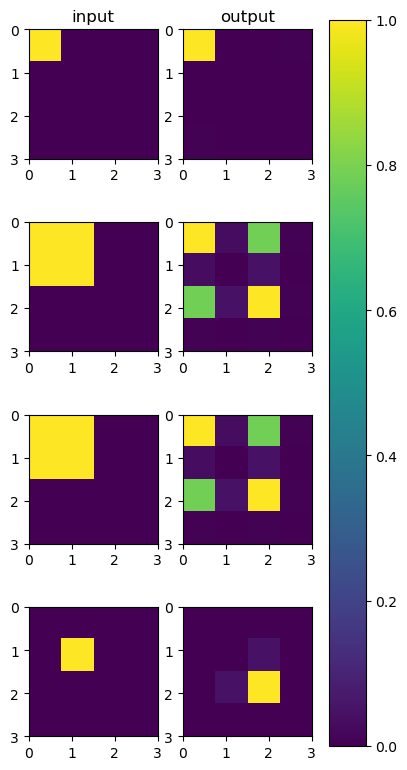

In [379]:
fig, ax = plt.subplots(4,2, figsize=(4,8))

cmap = 'viridis'
for i, o in enumerate(out):
    a = ax[i, 0].imshow(np.abs(_input[i]).reshape(4,4), cmap=cmap, origin='upper',
                   extent = [0, 3, 3,0])
    b = ax[i, 1].imshow(np.abs(o).reshape(4,4), cmap=cmap, origin='upper', extent = [0, 3, 3,0])

ax[0, 0].set_title('input')
ax[0, 1].set_title('output')
plt.tight_layout()
fig.colorbar(cm.ScalarMappable(cmap=cmap), ax=ax)
    

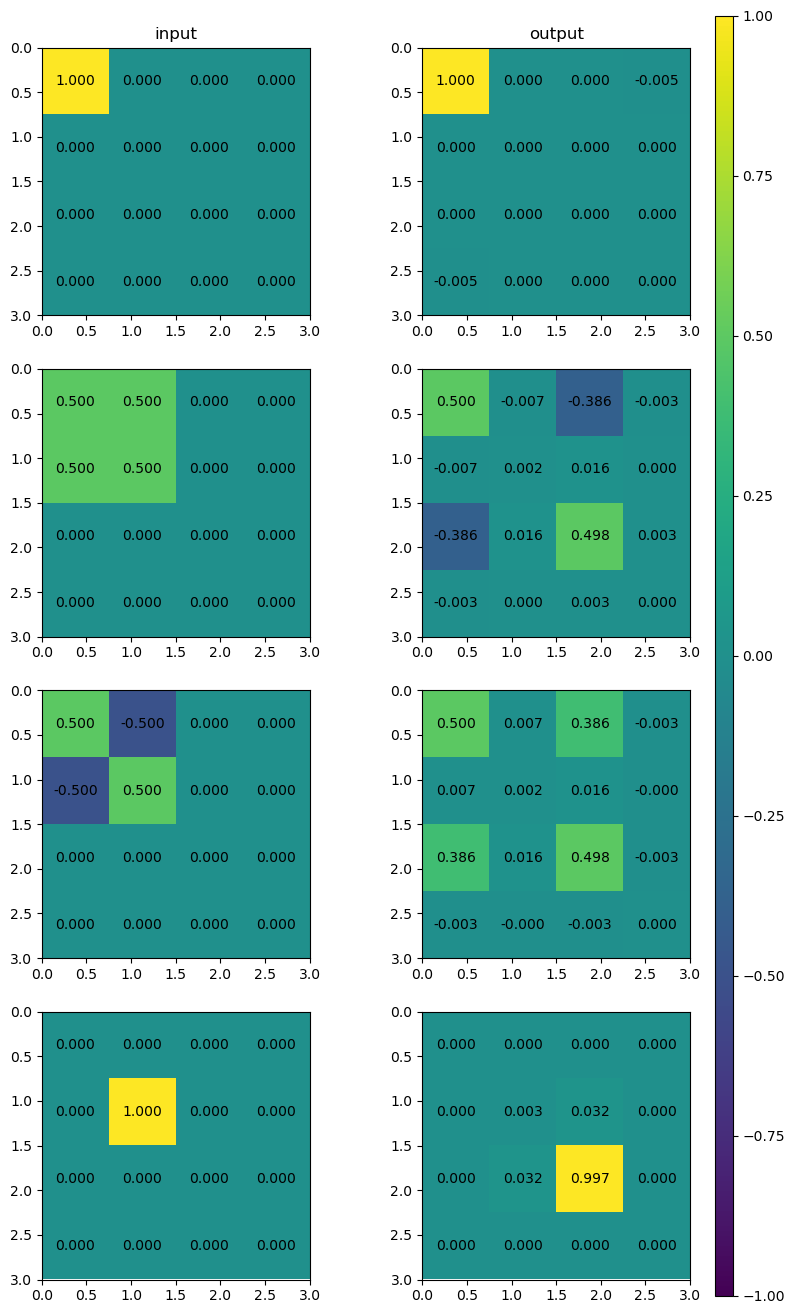

In [380]:
size = 4

# Limits for the extent
x_start = 0
x_end = 3
y_start = 0
y_end = 3

extent = [x_start, x_end, y_start, y_end]

# The normal figure
fig, ax = plt.subplots(4,2, figsize=(9, 16))

cmap = 'viridis'
for i, o in enumerate(out):
    data1 = np.real(_input[i]).reshape(4,4)
    a = ax[i, 0].imshow(data1, cmap=cmap, origin='upper',
                   extent = [0, 3, 3,0], vmin=-1, vmax=1)
    # Add the text
    jump_x = (x_end - x_start) / (2.0 * size)
    jump_y = (y_end - y_start) / (2.0 * size)
    x_positions = np.linspace(start=x_start, stop=x_end, num=size, endpoint=False)
    y_positions = np.linspace(start=y_start, stop=y_end, num=size, endpoint=False)

    for y_index, y in enumerate(y_positions):
        for x_index, x in enumerate(x_positions):
            label = data1[y_index, x_index]
            text_x = x + jump_x
            text_y = y + jump_y
            ax[i, 0].text(text_x, text_y, "{:.3f}".format(label), color='black', ha='center', va='center')

    data2 = np.real(o).reshape(4,4)        
    b = ax[i, 1].imshow(data2, cmap=cmap, origin='upper', extent = [0, 3, 3,0], vmin=-1, vmax=1)
    # Add the text
    jump_x = (x_end - x_start) / (2.0 * size)
    jump_y = (y_end - y_start) / (2.0 * size)
    x_positions = np.linspace(start=x_start, stop=x_end, num=size, endpoint=False)
    y_positions = np.linspace(start=y_start, stop=y_end, num=size, endpoint=False)

    for y_index, y in enumerate(y_positions):
        for x_index, x in enumerate(x_positions):
            label = data2[y_index, x_index]
            text_x = x + jump_x
            text_y = y + jump_y
            ax[i, 1].text(text_x, text_y, "{:.3f}".format(label), color='black', ha='center', va='center')
            
            
ax[0, 0].set_title('input')
ax[0, 1].set_title('output')

cb_ax = fig.add_axes([0.9, 0.1, 0.02, 0.8])
cbar = fig.colorbar(a, cax=cb_ax)

plt.savefig( "mcm_map_sig_real.png", format="png", dpi=300)